In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\100-days-of-machine-learning-main\\day42-outlier-removal-using-zscore\\placement.csv")

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
622,7.40,19.0,1
676,6.73,21.0,1
841,7.45,27.0,1
99,7.46,23.0,0
345,6.26,13.0,1


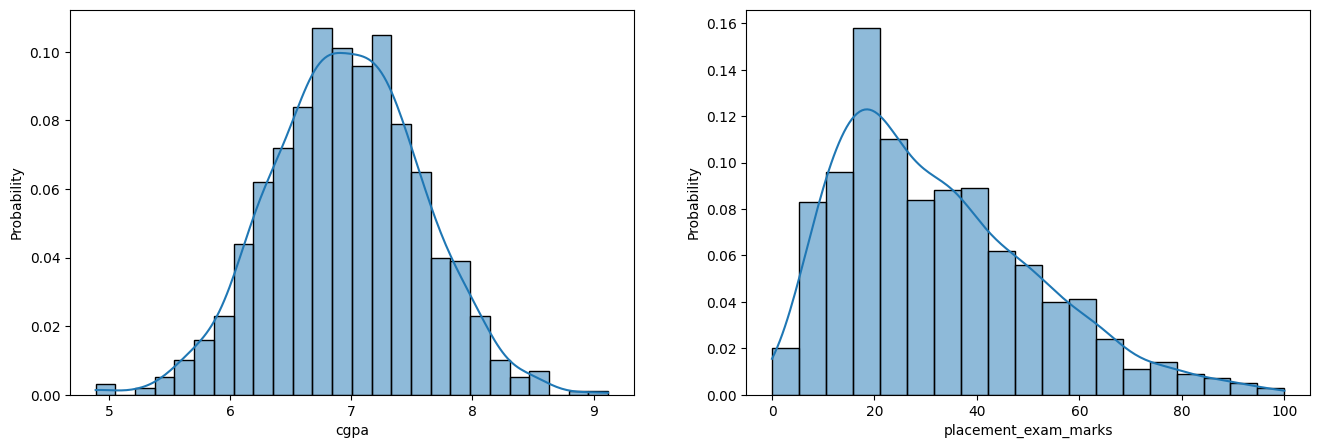

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True,stat="probability")

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True,stat='probability')

plt.show()

In [7]:
print("highest allowed",df['cgpa'].mean()+ 3*df['cgpa'].std())
print("lowest allowed", df['cgpa'].mean() - 3*df['cgpa'].std())

highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [11]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [13]:
new_df = df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [14]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [16]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [3]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

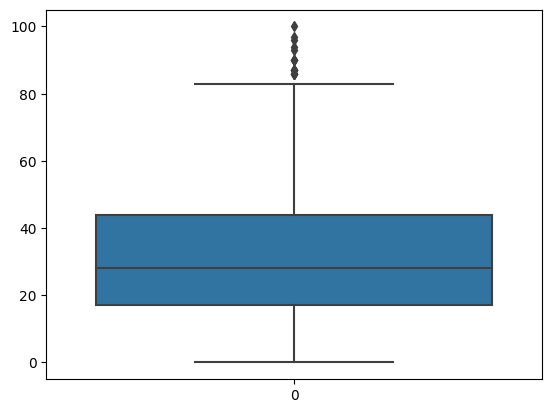

In [4]:
sns.boxplot(df['placement_exam_marks'])

In [5]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [6]:
iqr = percentile75 - percentile25

In [7]:
iqr

27.0

In [9]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [10]:
print("upper limit", upper_limit)
print("lower limit", lower_limit)

upper limit 84.5
lower limit -23.5


In [11]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [12]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [13]:
new_df.shape

(985, 3)

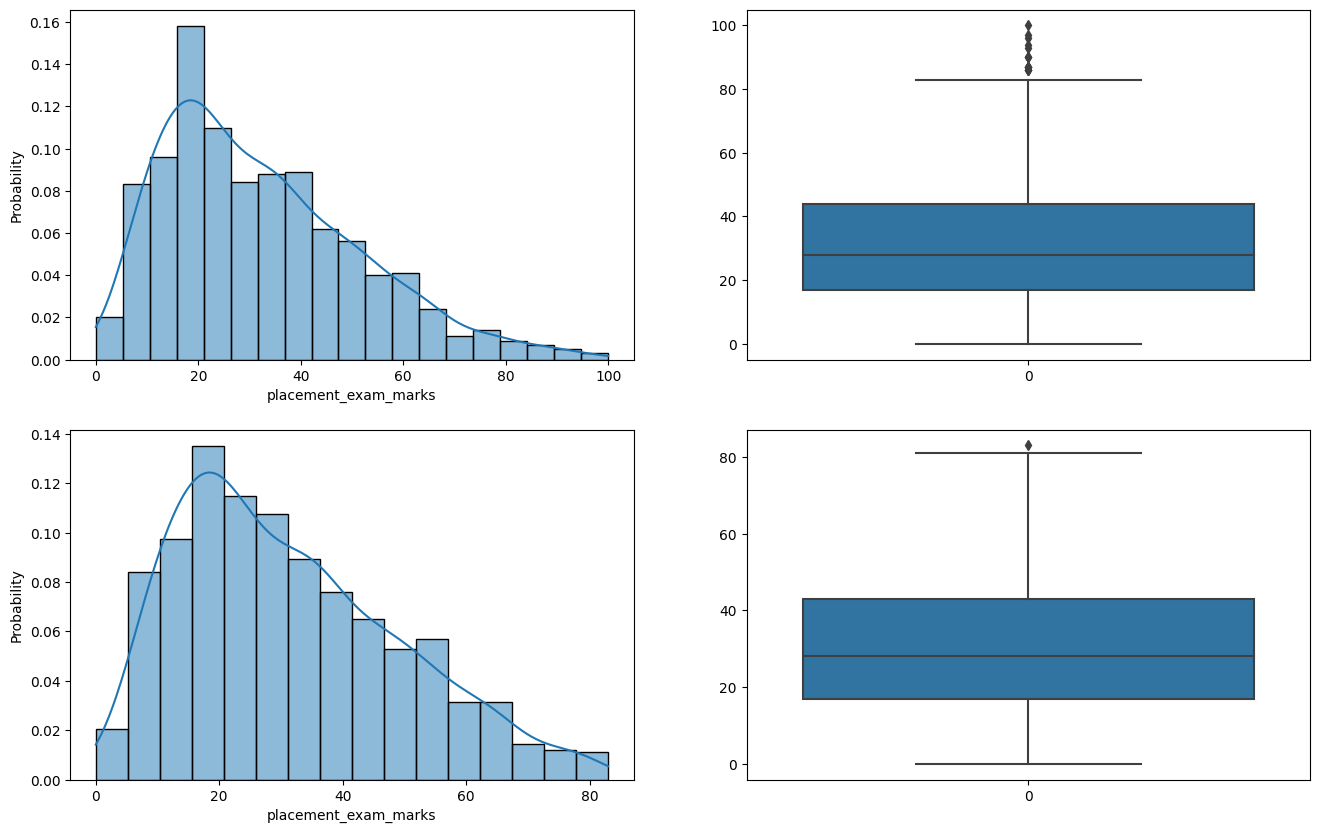

In [18]:
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.histplot(df['placement_exam_marks'],kde=True, stat='probability')

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.histplot(new_df['placement_exam_marks'],kde=True,stat='probability')

plt.subplot(224)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [19]:
new_df_cap = df.copy()

In [20]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit, upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit, lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [21]:
new_df_cap.shape

(1000, 3)

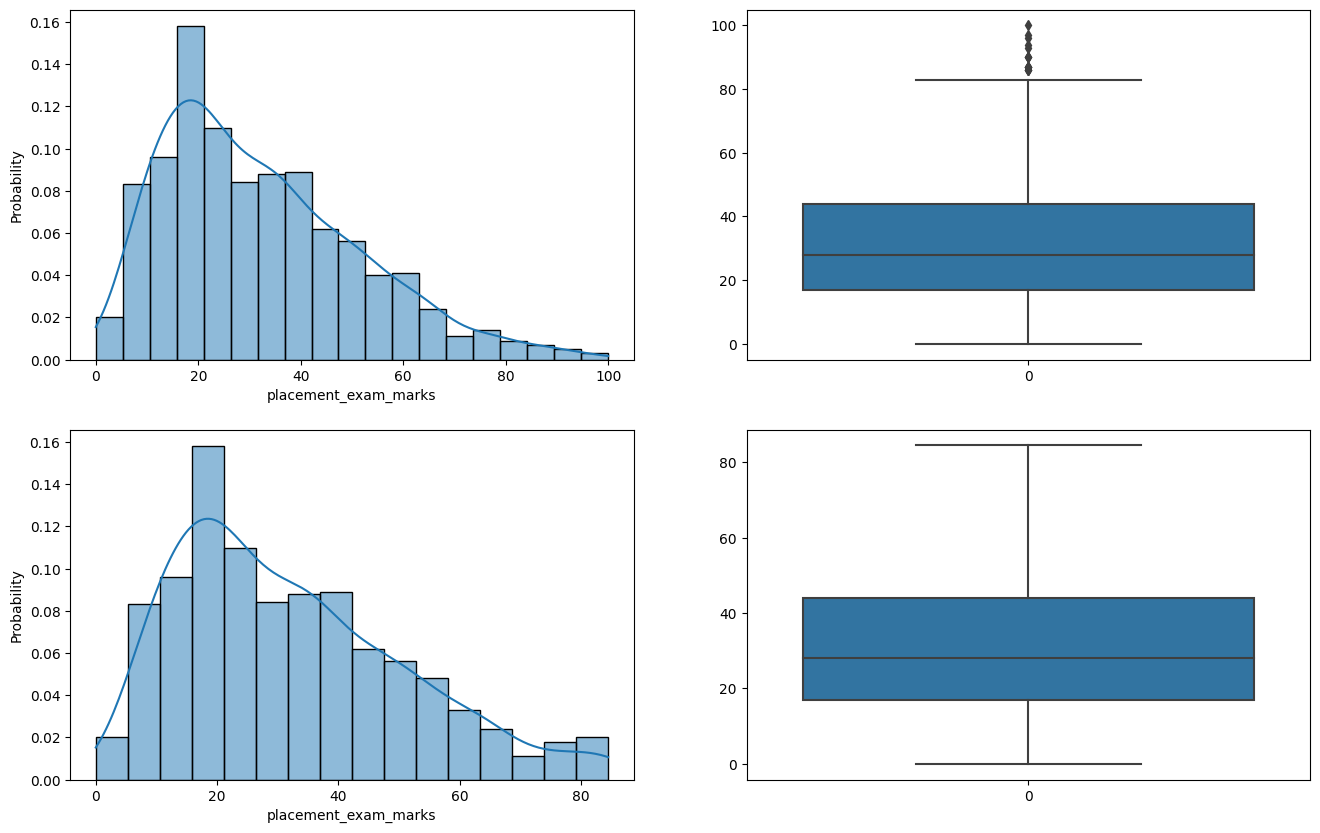

In [22]:
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.histplot(df['placement_exam_marks'],kde=True, stat='probability')

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True,stat='probability')

plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()